In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
# Viterbi for categorical observations
def viterbi(pi, A, B, obs_sequence):
    # Takes:
    # pi: Initial distribution over latent states
    # A: Transition matrix.
    # B: Hidden-to-observed matrix
    # obs_sequence: Observed states (categorial here, so a sequence of integers)
    
    n_obs = len(obs_sequence)
    n_hidden = A.shape[0]
    
    # Phi as defined in Murphy
    phi = B[:, obs_sequence].T
    
    # These will store the delta_t(j) and a_t(j)
    deltas = np.zeros((n_obs, n_hidden))
    a_s = np.zeros((n_obs, n_hidden))
    
    # Start off with delta at time 1 (not we're using python which starts indices at zero)
    deltas[0] = pi * phi[0]

    # Do the recursion
    for i in range(1, n_obs):
        
        # Pick out the current phi -- this is a vector giving
        # the likelihood of each hidden state given the observation
        cur_phi = phi[i]
        
        # Compute delta
        cur_full_delta = np.outer(deltas[i - 1], cur_phi) * A
        cur_delta = np.max(cur_full_delta, axis=0)
        deltas[i] = cur_delta
        
        # Compute a
        a_s[i] = np.argmax(cur_full_delta, axis=0)
                
    # Back-tracking:
    z_stars = np.zeros(n_obs, dtype=np.int)
    
    # Most probable final state:
    z_stars[-1] = deltas[-1].argmax()
    
    # Note tricky indexing: start at n_obs - 2 because n_obs - 1 
    # is the last element and we want one before that.
    for i in range(n_obs - 2, 0, -1):
        
        z_stars[i] = a_s[i + 1, z_stars[i + 1]]
        
    # Return the results -- don't really need the a_s but hey
    return deltas, a_s, z_stars

In [29]:
# Try the ice cream version
# I think this is easier to understand!

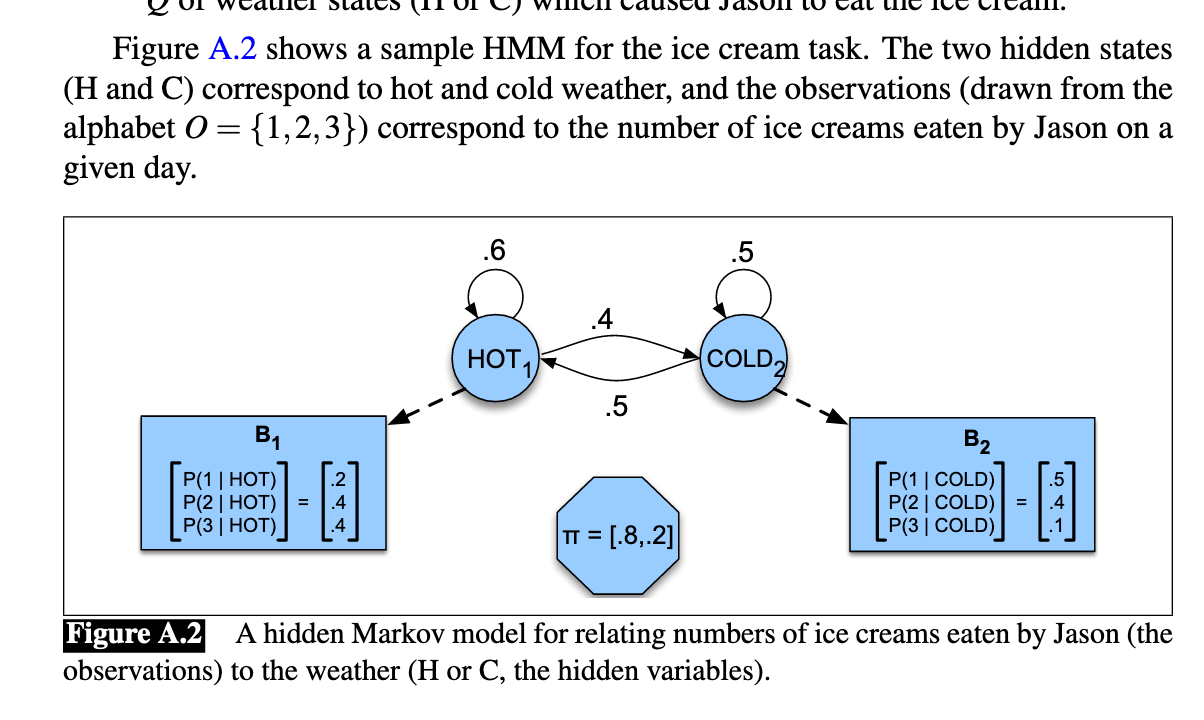

In [30]:
# State 1: hot
# State 2: cold
A = np.array([[0.6, 0.4],
              [0.5, 0.5]])

B = np.array([[0.2, 0.4, 0.4],
              [0.5, 0.4, 0.1]])

obs_seq = np.array([0, 2, 0, 1, 0, 1, 0, 0, 0])

pi = np.array([0.8, 0.2])

deltas, a_s, path = viterbi(pi, A, B, obs_seq)

In [35]:
# Most probable path
path + 1

array([1, 1, 2, 2, 2, 2, 2, 2, 2])

In [36]:
# Entry (t, j) here is the probability of the most probable path to state j at time t
deltas

array([[1.6000e-01, 1.0000e-01],
       [3.8400e-02, 6.4000e-03],
       [4.6080e-03, 7.6800e-03],
       [1.5360e-03, 1.5360e-03],
       [1.8432e-04, 3.8400e-04],
       [7.6800e-05, 7.6800e-05],
       [9.2160e-06, 1.9200e-05],
       [1.9200e-06, 4.8000e-06],
       [4.8000e-07, 1.2000e-06]])

In [37]:
path + 1

array([1, 1, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# Murphy example:

# Note that I had to add the end state.
# Also, the figure number appears to be wrong -- certainly for the version they cite?
# The Murphy book is really terrible sometimes.
# Transition matrix:
A = np.array([[0.3, 0.7, 0.0, 0.0],
              [0.0, 0.9, 0.1, 0.0],
              [0.0, 0.0, 0.4, 0.6],
              [0.0, 0.0, 0.0, 1.0]])

In [18]:
# Hidden to observed:
# Entry ij: From hidden state i to observed state j
# Unsure about the absorbing state?
B = np.array([[0.5, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.7, 0.1, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.1, 0.0, 0.5, 0.4],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [19]:
# We observe: 1, 3, 4, 6.
# So in python indexing, that's 0, 2, 3, 5:
phi = B[:, [0, 2, 3, 5]].T

# In the matrix phi, the rows give time, and the columns give the likelihood of each state.

In [20]:
phi

array([[0.5, 0. , 0. , 0. ],
       [0.2, 0.2, 0. , 0. ],
       [0. , 0.7, 0.1, 0. ],
       [0. , 0. , 0.5, 0. ]])

In [21]:
# We start off in state 1. So delta_1 is:
delta_1 = np.array([1, 0, 0, 0]) * phi[0]
delta_1

array([0.5, 0. , 0. , 0. ])

In [22]:
# Now we try to compute delta_2.
phi_2 = phi[1]
full_delta_2 = np.outer(delta_1, phi_2) * A
delta_2 = np.max(full_delta_2, axis=0)
delta_2

array([0.03, 0.07, 0.  , 0.  ])

In [23]:
# Now delta_3
phi_3 = phi[2]
full_delta_3 = np.outer(delta_2, phi_3) * A
delta_3 = np.max(full_delta_3, axis=0)
delta_3

array([0.    , 0.0441, 0.0007, 0.    ])

In [24]:
# Finally delta_4:
phi_4 = phi[3]
full_delta_4 = np.outer(delta_3, phi_4) * A
delta_4 = np.max(full_delta_4, axis=0)
delta_4

array([0.      , 0.      , 0.002205, 0.      ])

In [25]:
all_deltas, a_s, z_stars = viterbi(np.array([1, 0, 0, 0]), A, B, [0, 2, 3, 5])

In [26]:
# Entry (t, j) here is the probability of the most probable path to state j at time t
all_deltas

array([[0.5     , 0.      , 0.      , 0.      ],
       [0.03    , 0.07    , 0.      , 0.      ],
       [0.      , 0.0441  , 0.0007  , 0.      ],
       [0.      , 0.      , 0.002205, 0.      ]])